In [87]:
import statsmodels.api as sm
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import linregress
plt.style.use('ggplot')

#source= https://perspective.usherbrooke.ca/bilan/servlet/BilanEssai?codeStat=SP.POP.IDH.IN"

In [99]:
#IDH

base_90_IDH = {'code' : ["ZAF", "ALB", "DZA", "DEU", "SAU", "ARG", "ARM", "AUS", "AUT", "BHR", "BGD", "BEL", "BEN", "BOL", "BWA", "BRA", "BGR", "BDI", "KHM", "CMR", "CAN", "CAF", "CHL", "CHN", "CYP", "COL", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ESP", "EST", "SWZ", "USA", "FIN", "FRA", "GAB", "GMB", "GHA", "GRC", "GTM", "GIN", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBY", "LTU", "LUX", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NOR", "NZL", "UGA", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "TJK", "TZA", "CZE", "THA", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Bahreïn", "Bangladesh", "Belgique", "Bénin ", "Bolivie", "Botswana", "Brésil", "Bulgarie", "Burundi", "Cambodge", "Cameroun", "Canada", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Estonie", "Eswatini", "États-Unis", "Finlande", "France", "Gabon", "Gambie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Libye", "Lituanie", "Luxembourg", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Norvège", "Nouvelle-Zélande", "Ouganda", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Tadjikistan", "Tanzanie", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.618", "0.645", "0.577", "0.801", "0.697", "0.704", "0.631", "0.866", "0.795", "0.746", "0.387", "0.806", "0.348", "0.536", "0.581", "0.611", "0.694", "0.297", "0.364", "0.44", "0.849", "0.317", "0.701", "0.502", "0.732", "0.592", "0.536", "0.356", "0.728", "0.656", "0.388", "0.67", "0.676", "0.799", "0.598", "0.546", "0.727", "0.643", "0.754", "0.733", "0.536", "0.86", "0.784", "0.779", "0.62", "0.333", "0.455", "0.753", "0.478", "0.276", "0.538", "0.409", "0.506", "0.704", "0.427", "0.528", "0.572", "0.577", "0.763", "0.802", "0.792", "0.769", "0.638", "0.816", "0.617", "0.69", "0.468", "0.618", "0.4", "0.499", "0.704", "0.677", "0.732", "0.782", "0.643", "0.34", "0.231", "0.458", "0.619", "0.374", "0.65", "0.651", "0.579", "0.209", "0.359", "0.579", "0.378", "0.489", "0.21", "0.85", "0.818", "0.311", "0.404", "0.66", "0.38", "0.58", "0.829", "0.611", "0.586", "0.712", "0.711", "0.754", "0.701", "0.775", "0.734", "0.25", "0.529", "0.367", "0.718", "0.275", "0.718", "0.739", "0.767", "0.331", "0.625", "0.816", "0.832", "0.623", "0.37", "0.73", "0.574", "0.405", "0.672", "0.569", "0.579", "0.705", "0.692", "0.634", "0.475", "0.399", "0.401", "0.491"]}
base_95_IDH = {'code' : ["ZAF", "ALB", "DZA", "DEU", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BOL", "BWA", "BRA", "BGR", "BDI", "KHM", "CMR", "CAN", "CAF", "CHL", "CHN", "CYP", "COL", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ESP", "EST", "SWZ", "USA", "FIN", "FRA", "GAB", "GMB", "GHA", "GRC", "GTM", "GIN", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBY", "LTU", "LUX", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NOR", "NZL", "UGA", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SYR", "TJK", "TZA", "CZE", "THA", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bolivie", "Botswana", "Brésil", "Bulgarie", "Burundi", "Cambodge", "Cameroun", "Canada", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Estonie", "Eswatini", "États-Unis", "Finlande", "France", "Gabon", "Gambie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Libye", "Lituanie", "Luxembourg", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Norvège", "Nouvelle-Zélande", "Ouganda", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Syrie", "Tadjikistan", "Tanzanie", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.649", "0.632", "0.6", "0.834", "0.722", "0.731", "0.605", "0.883", "0.817", "0.612", "0.775", "0.425", "0.657", "0.852", "0.373", "0.571", "0.577", "0.648", "0.696", "0.296", "0.387", "0.422", "0.861", "0.303", "0.727", "0.55", "0.786", "0.625", "0.507", "0.333", "0.778", "0.687", "0.387", "0.696", "0.654", "0.831", "0.355", "0.629", "0.576", "0.764", "0.662", "0.8", "0.727", "0.52", "0.877", "0.816", "0.825", "0.632", "0.353", "0.473", "0.768", "0.507", "0.295", "0.578", "0.418", "0.529", "0.741", "0.46", "0.564", "0.553", "0.64", "0.795", "0.826", "0.823", "0.8", "0.657", "0.84", "0.684", "0.664", "0.456", "0.563", "0.428", "0.492", "0.673", "0.704", "0.703", "0.808", "0.683", "0.398", "0.262", "0.489", "0.648", "0.418", "0.669", "0.594", "0.555", "0.229", "0.398", "0.588", "0.41", "0.524", "0.229", "0.883", "0.851", "0.321", "0.428", "0.688", "0.425", "0.606", "0.861", "0.643", "0.598", "0.74", "0.76", "0.784", "0.687", "0.839", "0.7", "0.234", "0.577", "0.368", "0.695", "0.274", "0.773", "0.751", "0.782", "0.366", "0.65", "0.856", "0.848", "0.579", "0.55", "0.371", "0.753", "0.611", "0.409", "0.683", "0.607", "0.607", "0.664", "0.711", "0.658", "0.529", "0.415", "0.412", "0.467"]}
base_00_IDH = {'code' : ["ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TMP", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Timor oriental", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.63", "0.669", "0.644", "0.868", "0.387", "0.743", "0.771", "0.647", "0.898", "0.838", "0.64", "0.792", "0.468", "0.683", "0.873", "0.398", "0.608", "0.672", "0.565", "0.684", "0.712", "0.286", "0.303", "0.42", "0.431", "0.867", "0.57", "0.309", "0.759", "0.594", "0.802", "0.653", "0.49", "0.333", "0.817", "0.711", "0.394", "0.75", "0.686", "0.863", "0.363", "0.657", "0.611", "0.798", "0.67", "0.825", "0.78", "0.471", "0.885", "0.283", "0.858", "0.849", "0.633", "0.385", "0.673", "0.484", "0.796", "0.546", "0.329", "0.516", "0.604", "0.442", "0.554", "0.769", "0.493", "0.606", "0.607", "0.67", "0.857", "0.86", "0.853", "0.83", "0.662", "0.855", "0.702", "0.685", "0.451", "0.594", "0.466", "0.467", "0.728", "0.387", "0.727", "0.756", "0.855", "0.669", "0.456", "0.725", "0.399", "0.308", "0.53", "0.673", "0.442", "0.702", "0.597", "0.589", "0.298", "0.431", "0.558", "0.446", "0.57", "0.252", "0.917", "0.869", "0.704", "0.398", "0.595", "0.45", "0.719", "0.449", "0.624", "0.876", "0.678", "0.624", "0.785", "0.785", "0.81", "0.709", "0.867", "0.72", "0.335", "0.615", "0.38", "0.711", "0.284", "0.819", "0.764", "0.825", "0.402", "0.685", "0.897", "0.889", "0.59", "0.55", "0.395", "0.299", "0.796", "0.649", "0.507", "0.425", "0.716", "0.653", "0.655", "0.671", "0.742", "0.672", "0.579", "0.443", "0.432", "0.44"]}
base_05_IDH = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TMP", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Timor oriental", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.408", "0.614", "0.704", "0.692", "0.903", "0.455", "0.77", "0.782", "0.693", "0.908", "0.855", "0.679", "0.791", "0.505", "0.725", "0.889", "0.44", "0.51", "0.624", "0.7", "0.596", "0.7", "0.75", "0.324", "0.33", "0.49", "0.466", "0.892", "0.598", "0.319", "0.788", "0.647", "0.831", "0.683", "0.455", "0.5", "0.364", "0.855", "0.728", "0.413", "0.783", "0.731", "0.903", "0.405", "0.675", "0.634", "0.825", "0.693", "0.408", "0.844", "0.825", "0.48", "0.898", "0.346", "0.895", "0.869", "0.647", "0.416", "0.712", "0.509", "0.845", "0.571", "0.371", "0.567", "0.396", "0.614", "0.453", "0.58", "0.804", "0.535", "0.632", "0.631", "0.695", "0.896", "0.889", "0.872", "0.857", "0.695", "0.873", "0.729", "0.747", "0.49", "0.616", "0.506", "0.461", "0.802", "0.732", "0.378", "0.747", "0.809", "0.878", "0.702", "0.479", "0.731", "0.38", "0.363", "0.58", "0.713", "0.466", "0.728", "0.648", "0.65", "0.753", "0.357", "0.477", "0.556", "0.475", "0.596", "0.283", "0.465", "0.932", "0.888", "0.748", "0.437", "0.628", "0.5", "0.739", "0.479", "0.649", "0.891", "0.698", "0.65", "0.808", "0.8", "0.831", "0.755", "0.891", "0.752", "0.408", "0.651", "0.422", "0.742", "0.342", "0.868", "0.794", "0.861", "0.436", "0.718", "0.899", "0.905", "0.676", "0.635", "0.593", "0.448", "0.33", "0.835", "0.693", "0.496", "0.436", "0.752", "0.689", "0.69", "0.715", "0.756", "0.714", "0.616", "0.474", "0.48", "0.43"]}

IDH_90 = pd.DataFrame(base_90_IDH)
IDH_95 = pd.DataFrame(base_95_IDH)
IDH_00 = pd.DataFrame(base_00_IDH)
IDH_05 = pd.DataFrame(base_05_IDH)

In [103]:
#% population ayant entre 15 et 64 ans

base_90_POP = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'POP' : ["50.278930051588", "57.641634131669", "61.698500378824", "54.038100602734", "68.957536025235", "51.318082915298", "56.058570066254", "60.896417302511", "64.545536468806", "66.891254066532", "67.534034603904", "61.041001713016", "64.039264154645", "53.61498218939", "66.277038219691", "66.948491351601", "50.678168811257", "55.083339003872", "55.584765268873", "68.90725507283", "51.457799405728", "60.294983666458", "65.583142364185", "49.70788306956", "48.660247691676", "52.866878065379", "50.022369935926", "68.065093129712", "48.089153192791", "51.83433414459", "64.191083206399", "65.81963170843", "65.519150285352", "59.82456730951", "49.366880142142", "52.33403970345", "52.496247972267", "68.949428096273", "69.178941219646", "59.528676212977", "50.288838697119", "68.40411912371", "68.806155826655", "67.343868798174", "53.256776341949", "57.827783516463", "54.621799925807", "69.285080689619", "57.324092360288", "52.062247669724", "66.454491551776", "66.111586490895", "49.650472886181", "66.158876552212", "50.917855957592", "67.297166675524", "65.84589513281", "51.917621836622", "50.766637629365", "66.159210873955", "50.621590677066", "66.789566944324", "51.0584130821", "52.344654736763", "54.779840575321", "47.684121162693", "59.4713140454", "53.958363431175", "50.536874009792", "66.398949227927", "57.952767111562", "60.202665983399", "51.391012251038", "53.137638707817", "61.393460014125", "64.406839476981", "59.656287175319", "68.505549516998", "56.675576116432", "69.726480101223", "51.846843650223", "62.843052256705", "48.531064712808", "57.531058762601", "59.638434269936", "52.676991291459", "53.489166463313", "66.67230610945", "59.131043093614", "53.183996872017", "56.377722072522", "66.568221061231", "69.334048493639", "66.7234296102", "51.665042184637", "59.918937855677", "50.252639898781", "49.649078717043", "56.395741638754", "64.81138045841", "51.711941065599", "56.842826373841", "63.698684332848", "54.806464044918", "66.3163697", "52.740496014627", "59.239155359163", "54.234188037934", "54.832982693677", "51.403051690942", "50.832357851366", "52.042924895391", "64.750483628308", "65.68724771983", "53.65818178594", "48.855167249211", "56.153574649853", "52.809426323885", "59.479115539288", "55.502516512084", "54.721410861194", "68.913562993006", "57.00636097849", "56.117918160263", "64.979768617299", "65.889227773278", "71.647106636222", "65.84632656", "65.255441784076", "67.061987242944", "48.96350903437", "54.910093365621", "50.33382760524", "66.64128582", "53.099294213606", "72.829509805576", "64.545421715715", "68.394767636242", "50.176497806038", "49.559323870984", "52.136127322943", "61.934441302169", "64.284713681399", "68.342376506196", "59.675813313435", "50.551557492985", "53.022664573959", "50.701646248197", "49.473414507362", "66.026292586999", "65.741994616014", "51.871658719792", "61.054733902426", "57.503761689763", "55.895197093443", "59.541901278441", "66.450340384033", "62.796042685103", "58.064859769427", "56.045982690887", "46.172356122984", "48.590471665478", "48.886314102789"]}
base_95_POP = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'POP' : ["49.25417713427", "57.06974164829", "61.696937367478", "56.804866925097", "68.296430385797", "50.83770582801", "58.802748096404", "61.35917559923", "62.37722450988", "66.591027417154", "67.066790205549", "60.790428338021", "65.147063142198", "56.20793912722", "65.787096088435", "66.07967471267", "51.083562990588", "55.814010797367", "55.815359400337", "65.811631272085", "54.242942303681", "62.329565404197", "66.474180513435", "49.559001329291", "48.384350143938", "51.65177011314", "50.288849289992", "67.682357001064", "49.558499835311", "51.656228594169", "64.248200501693", "66.480347175188", "65.704777558433", "61.058420436462", "49.651325397588", "53.207297208301", "52.844198309277", "68.326763131185", "71.039005820613", "60.755821113417", "52.029047548567", "68.167855879844", "68.940443425615", "67.359792512086", "54.350372487467", "58.932535747945", "56.039901096995", "73.004720441366", "58.449676333873", "53.125816299261", "68.200168817584", "65.787991946447", "50.246756147668", "65.653867459447", "50.176916542083", "66.75273197058", "65.368602569047", "52.474410943667", "50.547778074306", "64.433420752014", "52.050720132504", "67.918666858937", "51.610745443685", "51.86152973342", "53.798236439137", "49.611670733301", "60.01560484748", "54.46638765196", "52.275100353416", "67.602870273408", "58.996448631006", "62.471855150699", "52.492968829136", "55.337010763534", "64.388059501347", "64.34449960961", "60.954076164852", "68.569316620927", "58.095451770403", "69.445999789124", "56.400807950303", "62.743070539439", "50.183937089138", "56.467471895739", "66.287956022804", "52.72195537148", "54.583875473514", "66.054769944406", "60.50053792769", "54.293855272211", "59.701318152748", "65.940635409669", "67.753053892509", "66.266323380868", "52.085841675447", "60.916428596117", "50.656135277065", "49.481103065907", "58.72174746107", "66.563912058834", "52.789337160235", "59.097572682142", "64.620744294485", "57.556311146023", "66.77836555", "53.268637747253", "61.021213853877", "54.616364259839", "55.077183522385", "53.675267035993", "51.048482825693", "52.884444683104", "64.584142182318", "65.441004950335", "57.487922705314", "48.062362677786", "56.241559209571", "52.115403314889", "61.095639393285", "56.453226876086", "54.985135483546", "68.337709843388", "58.730692071111", "57.408171595317", "66.128226078982", "67.141345674619", "72.55832237337", "67.16246558", "64.744842618286", "66.591878428932", "46.883397044117", "56.291465730419", "51.518152444076", "66.4936691", "52.901495762519", "73.462608020881", "66.507407995501", "69.424103990446", "50.678359102085", "50.015802511245", "50.541541302243", "64.016878491339", "63.642608482244", "67.637171321415", "59.601947110405", "53.077942532301", "51.28943152947", "51.705719204645", "48.950181278285", "68.171883749162", "68.272389551207", "52.934199402463", "64.108991896451", "60.56848741277", "56.513971082824", "61.768130250405", "65.979298593562", "62.905136676745", "59.602346927668", "58.392760172996", "46.388870034966", "48.859002586844", "51.114201269842"]}
base_00_POP = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'POP' : ["47.996934449488", "60.602432231522", "62.634165933249", "61.91916709551", "67.959913932855", "51.131171762068", "61.463276096624", "62.077881919567", "64.015542254934", "66.894254132264", "67.540631565465", "63.487381532652", "68.262697451092", "58.930364491658", "67.607613038876", "65.590246038653", "51.539677706118", "57.945749965515", "56.456443735208", "69.03018411954", "57.687199856165", "64.662202416206", "67.582316515762", "50.487924316042", "49.370483615991", "56.753785283593", "51.437732441062", "68.331857911365", "53.07844390956", "52.144941569549", "65.204337459223", "68.545472443505", "67.803582963129", "62.755186705908", "50.271863923653", "54.242540754237", "50.925935010667", "68.04522408992", "71.876099025936", "63.271945250198", "52.429583438246", "67.142548402373", "68.890761585555", "66.68726027051", "57.38677214273", "60.218376716022", "58.492020851806", "76.92767422427", "59.722114754302", "51.905204587193", "68.596160123749", "67.382299007822", "53.480191344658", "66.256966032482", "49.797406435081", "66.928354322633", "65.129602766384", "54.229381008999", "50.618244096334", "64.761561784613", "54.526945205874", "68.309888949276", "52.572057995752", "50.921402231771", "54.127875826488", "51.77913781463", "59.672999574469", "55.930382013067", "54.208375740323", "68.177401513715", "60.456507028027", "64.376638305089", "53.392392371583", "62.80069081435", "67.105776528506", "65.150890706383", "61.953253561656", "67.416653826495", "60.705055690499", "67.822628445044", "56.957840058511", "65.475880634034", "51.944313693102", "59.048521412179", "69.761871599149", "53.835235459328", "56.415169391033", "67.228011190667", "62.927662139099", "54.494039148612", "62.84780757315", "66.285026279737", "67.104502006299", "67.800477493032", "52.014863813129", "62.369823252409", "50.975939292145", "50.272299359175", "61.635222405445", "68.168287578936", "52.958484098444", "60.756681882899", "67.528606471064", "61.371096739079", "66.9872009", "52.816400343856", "63.255601896003", "55.154355819587", "55.584742043105", "56.34353182982", "50.543571547489", "53.509265074259", "64.83259546471", "65.520135316214", "60.368087325027", "47.28719888338", "58.529847350036", "53.618505550403", "62.595088867875", "57.372001058403", "56.87942919139", "67.817242887742", "60.70435584857", "58.532904485695", "68.499792919937", "67.367428317824", "75.141693384959", "67.80356373", "65.22325425299", "69.330592204197", "51.514179089156", "57.973381475349", "52.584741804562", "65.96545434", "52.673586577159", "74.600198218745", "69.015999529078", "70.078474494529", "50.237156257578", "52.517229606111", "50.424621843977", "66.062377016304", "64.30895080156", "67.312799853078", "62.312199307514", "55.68233481039", "53.882788271032", "52.550982332021", "48.418624125015", "69.793614083838", "69.843410385077", "54.272049389426", "68.889339270869", "64.407670007087", "58.683180963036", "63.509109860978", "68.495962505377", "62.537548699975", "61.295856878383", "62.42624188901", "47.975050648326", "49.353726879993", "54.920259121574"]}
base_05_POP = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'POP' : ["48.085106705468", "64.82689246656", "64.809073564433", "66.145223228649", "66.605054799177", "51.56030228536", "63.540075836831", "62.957046071114", "66.629195673733", "67.342601072327", "67.792446962511", "67.306715799643", "73.084449746707", "60.674245504515", "69.531511460859", "65.670219144701", "52.397514473118", "62.008026255685", "58.410023132241", "69.695322542551", "60.350896842626", "66.729767317583", "68.626346674883", "51.758159895769", "51.997526822252", "61.106267933398", "52.520951963976", "69.316205381216", "57.330303199395", "52.479944269607", "67.078880276243", "71.925893363648", "69.79214829593", "64.773189559494", "51.09063361021", "55.825711391106", "50.830928738746", "67.921914965954", "71.676298634739", "65.985856441561", "52.202117899033", "66.775128189239", "69.551802515962", "66.245179981835", "58.42544154471", "61.785868447515", "61.224772695958", "80.222803421682", "61.400435286492", "53.824920578642", "68.867062921334", "68.08307164444", "56.292646792663", "67.028915014139", "50.57036735429", "66.702900132308", "65.076382852877", "56.436233202798", "51.08159757355", "65.707718770271", "56.498831775026", "67.351242717438", "54.185451038901", "50.668747092829", "56.471034483157", "53.122552705727", "60.427413654439", "58.014626037675", "56.331619343911", "68.858410096843", "62.089690171336", "65.511086292516", "54.375373895622", "69.549906986552", "68.452547555448", "66.225968215171", "62.317370069424", "66.167429635074", "64.274189601784", "65.750744338506", "58.232093157134", "67.831457197425", "53.735432654791", "62.727514043358", "73.437758971818", "56.531043213958", "58.078995703501", "67.844550975267", "65.69888572035", "53.761421882376", "64.925626748677", "67.010238227994", "67.453391831295", "68.760681447806", "52.703467648934", "64.100107716787", "49.955017967138", "50.644699906704", "64.209151304444", "68.858024495091", "53.213750479068", "62.276900531329", "70.091945732749", "66.452561389936", "66.75778848", "52.325130313818", "64.864702587644", "57.096540006572", "56.953512844344", "58.998551335202", "49.472092524829", "53.162856903817", "65.649603595744", "66.47979895378", "64.765910514983", "47.597115390206", "62.593601509297", "55.357716404834", "63.744226932231", "58.408752176165", "59.383785799136", "67.504277347366", "62.233146827363", "59.499444655048", "70.464245160665", "66.679352783764", "77.679065876448", "69.03227864", "66.086948255765", "70.99583508836", "54.170128079619", "58.890150198325", "53.386988057379", "66.88536055", "52.851882363416", "75.570125240598", "71.39676482167", "70.447857456572", "49.624420528251", "54.484451091046", "51.225016082873", "66.868059892245", "65.363171139067", "68.040083008069", "63.867502099398", "57.969632563625", "57.495806300475", "52.575031651956", "49.032105108919", "71.23515081984", "71.107761438629", "54.93337897147", "72.095841317736", "68.082359032279", "62.738664797294", "65.396872437335", "69.300517494124", "62.616282837478", "63.071755295034", "66.222525221565", "50.515965246027", "50.534253758765", "54.93067855566"]}

POP_90 = pd.DataFrame(base_90_POP)
POP_95 = pd.DataFrame(base_95_POP)
POP_00 = pd.DataFrame(base_00_POP)
POP_05 = pd.DataFrame(base_05_POP)

In [104]:
#% population urbaine

base_90_URB = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'URB' : ["21.177", "52.037", "36.428", "52.085", "73.118", "37.144", "76.583", "86.984", "67.421", "85.433", "62.96", "53.749", "88.14", "19.811", "65.981", "96.377", "34.485", "16.388", "55.577", "39.249", "41.933", "73.922", "66.377", "13.815", "6.271", "15.546", "39.657", "76.582", "44.12", "36.825", "83.271", "26.442", "66.776", "69.481", "27.869", "54.324", "30.633", "58.384", "73.844", "50.003", "39.345", "51.037", "73.364", "84.843", "75.957", "55.226", "43.478", "79.051", "55.09", "18.905", "75.351", "71.231", "20.202", "75.3", "12.621", "79.367", "74.056", "69.143", "38.312", "55.038", "36.441", "71.467", "41.992", "28.026", "34.745", "30.83", "29.583", "28.51", "40.46", "65.838", "25.547", "30.584", "69.706", "56.33", "56.929", "90.75", "90.359", "66.726", "49.444", "77.339", "73.291", "56.266", "16.748", "37.777", "97.974", "15.437", "13.967", "69.25", "83.12", "55.422", "75.723", "67.583", "80.947", "57.789", "23.566", "49.794", "11.56", "23.322", "48.391", "43.9", "39.323", "71.419", "46.762", "57.033", "48.037", "25", "25.243", "27.656", "8.854", "53.075", "15.368", "29.68", "71.956", "84.742", "66.102", "11.076", "41.365", "30.576", "53.903", "14.994", "48.694", "68.684", "68.901", "46.986", "61.27", "47.915", "92.786", "53.217", "78.14", "73.394", "5.416", "49.274", "38.896", "50.393", "33.252", "100", "56.491", "50.39", "29.658", "28.61", "13.276", "18.535", "83.1", "73.926", "65.706", "48.931", "31.658", "18.884", "20.811", "75.22", "29.424", "28.589", "54.124", "57.946", "45.075", "59.203", "66.757", "88.973", "84.284", "20.257", "20.931", "39.407", "28.988"]}
base_95_URB = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'URB' : ["21.624", "54.486", "38.911", "55.997", "73.922", "44.169", "78.67", "88.164", "66.057", "84.898", "61.596", "52.206", "88.388", "21.693", "67.926", "96.777", "36.758", "20.537", "59.15", "40.817", "48.981", "77.61", "67.782", "15.131", "7.211", "17.311", "42.573", "77.675", "48.768", "37.231", "84.545", "30.961", "68.038", "71.777", "28.301", "56.413", "32.838", "59.018", "78.239", "54.561", "41.21", "52.279", "74.277", "84.979", "76.3", "57.598", "42.814", "78.319", "57.766", "22.514", "75.856", "70.3", "22.286", "77.257", "13.827", "80.963", "74.912", "74.797", "43.362", "53.841", "40.14", "72.119", "43.654", "29.475", "40.494", "34.371", "29.137", "32.59", "42.941", "65.209", "26.607", "36.076", "68.78", "60.236", "57.949", "91.63", "90.866", "66.922", "50.615", "78.016", "78.207", "55.921", "18.263", "36.349", "98.096", "17.378", "16.955", "68.75", "84.82", "45.96", "75.994", "67.285", "82.893", "59.587", "25.796", "55.688", "13.263", "25.519", "51.692", "43.284", "38.705", "73.368", "46.294", "56.805", "53.365", "27.495", "26.124", "29.813", "10.883", "54.437", "15.773", "32.205", "73.787", "85.553", "71.669", "12.846", "43.731", "31.836", "58.141", "14.081", "52.131", "72.809", "70.951", "46.56", "61.493", "51.109", "94.998", "53.769", "78.353", "73.372", "9.837", "53.988", "39.606", "51.651", "34.429", "100", "56.537", "50.622", "31.425", "32.232", "15.873", "18.458", "83.824", "73.654", "66.076", "50.104", "28.877", "20.543", "21.473", "74.643", "30.276", "30.705", "55.04", "61.474", "44.794", "62.123", "66.951", "90.542", "86.014", "22.166", "23.76", "37.104", "31.732"]}
base_00_URB = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'URB' : ["22.078", "56.891", "41.741", "59.919", "74.965", "50.087", "79.848", "89.142", "64.666", "84.235", "60.213", "51.386", "88.372", "23.59", "69.973", "97.129", "38.333", "25.418", "61.787", "42.384", "53.219", "81.192", "68.899", "17.844", "8.246", "18.586", "45.542", "79.478", "53.435", "37.639", "86.073", "35.877", "68.648", "73.957", "28.08", "58.695", "35.122", "59.412", "79.621", "59.052", "43.155", "53.428", "75.323", "85.1", "76.532", "61.753", "42.797", "80.236", "60.299", "26.587", "76.262", "69.368", "22.686", "79.057", "14.74", "82.183", "75.871", "78.879", "47.868", "52.638", "43.929", "72.716", "45.332", "30.869", "49.092", "36.243", "28.694", "35.6", "45.458", "64.575", "27.667", "42.002", "68.496", "64.042", "59.155", "92.401", "91.203", "67.222", "51.814", "78.649", "78.27", "56.098", "19.892", "35.298", "99", "21.977", "19.548", "68.067", "86", "44.331", "76.387", "66.986", "84.216", "58.548", "27.121", "61.977", "14.61", "28.356", "53.335", "42.67", "38.091", "74.722", "44.589", "57.133", "58.544", "29.098", "27.025", "32.373", "13.397", "55.185", "16.186", "34.84", "76.02", "86.021", "71.569", "14.786", "46.126", "32.982", "62.198", "13.204", "55.331", "76.795", "73.042", "46.135", "61.716", "54.399", "96.311", "53.004", "78.651", "73.35", "14.926", "58.912", "40.32", "52.769", "35.626", "100", "56.233", "50.754", "33.247", "32.495", "16.504", "18.38", "84.026", "73.383", "66.444", "51.947", "26.501", "22.309", "21.637", "73.988", "31.386", "32.907", "55.905", "63.432", "45.913", "64.741", "67.145", "92.028", "87.559", "24.374", "26.267", "34.802", "33.758"]}
base_05_URB = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'URB' : ["22.703", "59.536", "46.731", "63.83", "75.98", "56", "80.979", "90.031", "63.938", "84.582", "58.813", "52.389", "88.422", "26.809", "72.354", "97.403", "40.543", "30.965", "64.17", "43.965", "55.944", "82.834", "70.584", "21.537", "9.375", "19.174", "48.541", "80.122", "57.689", "38.069", "86.783", "42.522", "68.268", "76.024", "27.875", "60.988", "37.481", "59.805", "81.345", "65.672", "45.234", "54.315", "76.134", "85.856", "76.761", "67.37", "43.027", "82.262", "61.711", "31.099", "77.263", "68.735", "22.038", "79.928", "15.7", "82.905", "77.13", "82.452", "52.02", "53.605", "47.308", "74.452", "46.913", "32.257", "57.74", "38.157", "27.822", "42.638", "48.585", "66.365", "29.235", "45.942", "68.766", "67.558", "60.477", "93.037", "91.518", "67.738", "52.811", "85.978", "79.485", "56.463", "21.675", "35.29", "100", "27.186", "22.249", "68", "86.627", "46.051", "77.08", "66.635", "86.598", "57.532", "28.814", "66.594", "15.054", "32.06", "55.174", "42.112", "42.111", "76.308", "42.775", "62.494", "62.465", "29.999", "27.946", "36.632", "15.149", "55.935", "16.242", "39.074", "77.675", "86.341", "72.4", "16.96", "48.537", "33.982", "63.682", "13.109", "57.633", "82.63", "75.034", "45.71", "61.452", "57.522", "97.396", "53.174", "79.915", "73.463", "16.912", "61.648", "41.714", "53.883", "36.919", "100", "55.563", "51.533", "36.311", "32.76", "17.154", "18.303", "84.319", "73.478", "66.682", "53.782", "26.51", "24.845", "21.801", "73.602", "37.411", "35.185", "54.967", "65.237", "47.052", "67.84", "67.79", "93.319", "87.954", "27.281", "28.936", "36.911", "34.11"]}

URB_90 = pd.DataFrame(base_90_URB)
URB_95 = pd.DataFrame(base_95_URB)
URB_00 = pd.DataFrame(base_00_URB)
URB_05 = pd.DataFrame(base_05_URB)

In [102]:
#taux de chômage

base_90_CHO = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'CHO' : ["7.942", "20.543", "10.307", "20.6", "5.32", "16.668", "7.285", "5.44", "1.6", "9.59", "3.42", "0.9", "1.144", "2.2", "0.6", "6.98", "1.691", "1.382", "2.934", "17.55", "13.82", "6.254", "11.1", "2.431", "3.195", "0.781", "9.348", "10.32", "13.749", "5.73", "5.23", "2.37", "3", "10.12", "4.943", "19.98", "3.371", "2.375", "2.41", "5.37", "6.564", "11.14", "8.321", "9.1", "27.481", "6.904", "9.38", "1.66", "4.354", "5.572", "15.93", "1.47", "20.264", "6.8", "3.326", "6.5", "9.13", "17.065", "9.523", "2.7", "3.49", "7.57", "2.696", "4.541", "7.393", "3.097", "12.171", "7.352", "4.58", "8.5", "6.838", "2.62", "8.711", "11.1", "15.77", "2.55", "13.39", "10.1", "6.314", "2.06", "21.211", "0.9", "2.86", "1", "0.89", "2.496", "15.303", "2.7", "8.671", "2.782", "18.848", "1.1", "1.48", "24.5", "6.323", "3.697", "4.882", "1.374", "13.664", "9.515", "9.994", "3.15", "1.9", "5.678", "29.87400055", "2.896", "0.889", "19.14", "10.622", "8.066", "1.618", "3.83", "5.47", "10.61", "4.177", "3.407", "1.9", "0.583", "6.501", "2.856", "5.1", "7.28", "4.979", "3.777", "13.642", "3.92", "0.87", "8.18999958", "8.55", "5.134", "12.776", "7.53", "5.782", "13.15799999", "4.147", "2.18", "12.165", "7.08", "19.17", "15", "12.278", "14.66", "3.13", "1.82", "17.09", "6.75", "1.9", "3.6", "0.662", "2.27", "2.63", "4.046", "18.52", "15.996", "1.4", "8.11", "1.9", "8.95", "9.45", "2.198", "8.184", "18.9", "4.75"]}
base_95_CHO = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'CHO' : ["7.942", "20.032", "14.611", "31.84", "8.16", "16.924", "6.402", "18.8", "6.7", "8.47", "4.35", "7.2", "1.129", "2.448", "17.7", "9.34", "1.32", "1.393", "2.665", "21.066", "21.393", "7.09", "11.1", "2.53", "3.391", "0.971", "8.807", "9.49", "12.838", "5.877", "4.7", "3", "2.6", "8.72", "4.764", "20.351", "3.388", "2.646", "2.06", "5.18", "4.1", "9.996", "8.27", "6.99", "28.217", "6.444", "11.04", "1.8", "4.386", "5.702", "22.68", "9.66", "21.65", "5.65", "2.953", "17", "11.83", "17.335", "10.046", "7.6", "6.495", "10.12", "2.59", "4.42", "7.907", "3.223", "11.597", "7.58", "3.24", "10.17", "6.998", "4.613", "8.502", "9.866", "11.97", "5.2", "8.78", "11.66", "6.404", "3.15", "14.6", "10.98", "2.949", "1.437", "0.696", "2.6", "15.719", "19", "8.512", "2.762", "19.532", "17.54", "2.92", "35.6", "6.209", "3.15", "4.881", "1.476", "14.047", "9.59", "9.704", "7.1", "5.3", "5.5", "30.38699913", "2.784", "0.775", "21.405", "10.638", "7.513", "1.496", "4.276", "6.31", "6.46", "4.273", "3.117", "7.8", "0.586", "6.55", "2.664", "3.4", "7.16", "4.757", "3.718", "13.34", "7.06", "0.87", "8.010000229", "8.69", "9.45", "12.253", "7.65", "5.731", "13.39999962", "4.353", "3.3", "13.11", "7.15", "19.618", "15.01", "12.297", "12.27", "8.9", "3.09", "8.39", "7.2", "10.3", "3.782", "0.756", "4.02", "1.1", "3.955", "17.22", "16.338", "8.3", "7.24", "5.62", "10.02", "10.24", "1.964", "8.986", "16.847", "5.557"]}
base_00_CHO = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'CHO' : ["7.942", "20.069", "19.028", "29.77", "7.92", "16.562", "4.57", "15", "11.023", "6.29", "4.69", "11.78", "1.145", "3.27", "12.169", "6.59", "0.868", "1.65", "2.439", "25.483", "15.88", "10.894", "16.22", "2.721", "3.285", "0.75", "7.516", "6.83", "12.989", "5.675", "10.49", "3.26", "4.77", "20.52", "4.34", "19.913", "3.356", "3.143", "4.06", "5.08", "4.948", "16.06", "5.45", "4.48", "27.176", "6.43", "8.98", "2.25", "4.8", "5.954", "13.79", "13.36", "24.616", "3.99", "3.495", "11.13", "10.22", "18.016", "9.519", "10.82", "10.46", "11.34", "2.615", "4.612", "8.115", "3.786", "11.909", "8.448", "3.882", "6.56", "7.85", "6.08", "8.155", "11.691", "4.32", "1.94", "11.1", "10.83", "6.823", "4.75", "13.7", "12.75", "2.987", "1.877", "0.8", "2.051", "16.209", "14.21", "8.495", "1.931", "19.166", "15.93", "2.35", "32.2", "5.8", "3", "5.07", "1.397", "13.58", "9.1", "10.019", "2.65", "8.54", "5.987", "30.47299957", "2.839", "0.747", "20.3", "10.668", "7.208", "1.415", "3.991", "3.46", "6.13", "4.387", "3.535", "12.283", "0.585", "6.344", "2.92", "7.61", "2.73", "4.963", "3.768", "16.31", "3.81", "0.87", "6.967000008", "5.56", "10.58", "11.831", "6.96", "5.298", "12.60000038", "4.161", "3.7", "18.55", "6.92", "18.483", "14.913", "12.239", "7.74", "5.47", "2.66", "12.973", "9.592", "14.972", "3.152", "0.782", "8.76", "2.39", "4.152", "12.1", "14.94", "11.747", "6.3", "11.71", "12.63", "13.99", "2.26", "11.564", "12.93", "5.683"]}
base_05_CHO = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"], 'CHO' : ["7.925", "19.608", "15.97", "15.27", "11.17", "16.173", "6.05", "11.51", "10.137", "5.04", "5.68", "7.26", "1.052", "4.25", "8.742", "8.44", "0.877", "3.1", "2.597", "30.213", "19.865", "10.55", "10.08", "4", "3.244", "1.071", "4.4", "6.76", "13.481", "5.684", "9.34", "4.52", "5.48", "11.06", "4.583", "19.8", "2.95", "3.049", "3.48", "6.75", "6.193", "12.6", "1.95", "4.83", "26.815", "6.59", "11.05", "3.12", "3.78", "5.933", "9.15", "8.03", "27.246", "5.08", "2.5", "8.38", "8.88", "16.91", "9.786", "13.81", "5.814", "10.07", "3.06", "4.999", "8.214", "3.27", "11.075", "14.6", "4.91", "7.19", "8.7", "7.94", "8.587", "11.81", "4.34", "2.55", "11.34", "7.73", "6.605", "4.45", "14.8", "8.13", "2.757", "2.363", "1.452", "1.35", "15.965", "10.03", "8.24", "2.445", "18.738", "8.32", "4.49", "37.32", "2.62", "3.53", "4.923", "1.351", "11.01", "9.52", "9.481", "3.56", "5.63", "7.017", "30.30999947", "3.041", "0.687", "22.109", "10.675", "5.37", "3.1", "3.692", "4.38", "3.81", "4.597", "1.9", "7.069", "0.58", "6.053", "2.391", "4.82", "5.87", "4.87", "3.8", "17.75", "7.58", "0.87", "7.173999786", "4.75", "7.12", "11.928", "7.22", "8.659", "20.85000038", "3.786", "5.59", "16.28", "6.55", "18.509", "14.786", "12.145", "7.67", "7.49", "4.44", "9.264", "8.82", "12.994", "3.177", "0.63", "7.93", "1.35", "4.131", "7.95", "12.87", "7.454", "10.63", "7.18", "12.01", "10.66", "2.075", "12.223", "15.9", "4.665"]}

CHO_90 = pd.DataFrame(base_90_CHO)
CHO_95 = pd.DataFrame(base_95_CHO)
CHO_00 = pd.DataFrame(base_00_CHO)
CHO_05 = pd.DataFrame(base_05_CHO)

In [105]:
#taux de mortalité infantile

base_90_MOR = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'MOR' : ["120.9", "47.8", "35.4", "43.6", "7", "132", "35.5", "25.4", "41.8", "7.6", "8", "75.9", "19.6", "101", "12.1", "8.4", "104.4", "88.9", "83.9", "16.1", "33.8", "52.7", "14.6", "98.7", "103.2", "84.9", "84.6", "6.8", "46.6", "115.4", "16.1", "42.7", "10", "29.2", "88.8", "59.5", "119.7", "33.4", "13.4", "14", "104.3", "11.2", "10.8", "7.4", "91.6", "46", "62.9", "14.2", "42.3", "93.9", "7.5", "14", "51.8", "9.4", "119.5", "5.5", "7.5", "60.1", "81.2", "41", "80", "9.1", "59.5", "137.5", "120.9", "131.7", "46.9", "100.4", "45.2", "15.2", "88.8", "61.8", "42.3", "44.5", "7.6", "5.1", "9.7", "8.4", "23.5", "4.6", "29.5", "44", "65", "53.7", "14.7", "106", "67.8", "13.1", "26.7", "175.8", "35.7", "11.9", "7.4", "33.3", "95.5", "14.3", "142.5", "120.4", "63.6", "20.1", "71.2", "36.2", "27.6", "76.7", "14.8", "163.3", "81.7", "48.9", "96.4", "50.9", "133.8", "124.2", "7", "9.2", "31.7", "107", "57.9", "106.9", "26.1", "62.4", "36.4", "6.8", "56.6", "39.9", "15.2", "11.5", "17.8", "24.4", "7.9", "17.3", "91.7", "46.3", "71", "24", "154.8", "6.1", "12.6", "8.8", "108.5", "82.4", "148.5", "19.4", "5.9", "6.6", "38.8", "30.1", "81", "100.5", "111.7", "10.3", "30.3", "90.9", "26.7", "43.2", "64.5", "55.5", "16.4", "20.1", "24.7", "37.1", "88.7", "108.2", "51.1"]}
base_95_MOR = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'MOR' : ["103.9", "45.9", "29.6", "41", "5.3", "131.4", "25.4", "21.6", "33.9", "5.8", "5.7", "75.2", "15.6", "81.3", "12.4", "6.3", "94", "72.1", "70", "11.8", "37.5", "41.1", "15.4", "97.1", "104.2", "86.6", "90", "5.8", "44.1", "113.1", "11.1", "38.4", "8", "24.9", "77.5", "67.2", "114.6", "53.2", "9", "12.7", "102.4", "8.7", "8.6", "5.4", "85.6", "38.1", "49.4", "11.3", "33", "72.7", "5.5", "12.4", "58.7", "7.9", "103.7", "4.3", "5.3", "57.4", "71.1", "38.9", "72.7", "7.4", "49.2", "119.1", "116.5", "119.2", "41.7", "87.1", "37.1", "10.8", "78", "50.5", "38.9", "36.5", "6.1", "4.2", "7.1", "6.4", "20.5", "4.1", "25.6", "44.7", "67.1", "52.7", "12.3", "90.3", "67.5", "15.6", "21.6", "164.8", "28.5", "12", "5.3", "22", "81.9", "11.5", "120.2", "112.1", "53", "19.8", "68.6", "29.4", "31.4", "63.6", "13.5", "145.4", "73.2", "47", "75.6", "40.6", "116.3", "121.1", "4.6", "7.2", "20.4", "97.3", "57.3", "96.3", "23.7", "57.6", "31.3", "5.7", "42.7", "32.4", "12.6", "7.4", "13.1", "22.1", "6.1", "17.6", "129.6", "35.9", "71", "17", "149.3", "4", "10.1", "6.2", "104.5", "75.6", "131.3", "17", "4", "5.2", "32.8", "24.5", "87.6", "93.9", "106", "7.1", "23.7", "84.8", "25.3", "34.4", "65", "42.1", "17.2", "18", "22.1", "29.6", "79.7", "101.7", "55.5"]}
base_00_MOR = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'MOR' : ["90.6", "48.9", "24.1", "35.6", "4.4", "121.9", "18.8", "17.6", "27", "5.1", "4.6", "61.1", "10.7", "63.1", "10", "4.8", "85", "57.4", "55.8", "8.7", "35.1", "30.4", "14.3", "90.8", "94.7", "79.2", "87.7", "5.3", "31", "108.5", "9.2", "30", "5.7", "21.2", "69.6", "72.1", "106.9", "44.5", "6.4", "11.1", "95.6", "7.2", "7", "4.7", "79.6", "32.5", "37.2", "9.6", "24.7", "56.3", "4.4", "8.7", "67.7", "7.1", "87", "3.5", "4.1", "53.7", "61.7", "32.1", "64.6", "5.6", "41", "100.6", "106.9", "105.3", "37.1", "74.4", "30.6", "8.7", "66.7", "41", "35.6", "29.6", "6", "3.2", "5.6", "4.7", "17.9", "3.3", "22.6", "36.8", "59.8", "42.5", "11", "76.6", "68.3", "11.5", "17.2", "127.6", "24.1", "8.6", "3.8", "14.3", "67.5", "8.7", "100.1", "101.7", "44", "16.6", "62.7", "23.7", "26.1", "48.8", "12.7", "112", "65.1", "44.9", "58.7", "31.6", "98.2", "109.6", "3.9", "6.1", "14.1", "87.2", "50.7", "84.8", "21.9", "53.6", "27.9", "5.1", "29.3", "28.7", "8.1", "5.5", "10.7", "18.3", "5.6", "15.5", "109.6", "27.4", "67.7", "11", "138.6", "3", "8.2", "4.6", "104.5", "67", "109.1", "14.2", "3.4", "4.7", "27.5", "19.6", "67.6", "78.6", "99.9", "4.5", "18.7", "75.7", "24.9", "25", "57.6", "30.9", "15.6", "14.9", "18.3", "23.6", "68.8", "90.4", "52.2"]}
base_05_MOR = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'MOR' : ["77.4", "50.1", "17.8", "29", "3.9", "101", "14.2", "14.8", "21.2", "4.8", "4.1", "44.2", "9.1", "49.3", "6.7", "4.2", "76.6", "44.7", "43.2", "7.8", "41.4", "22", "11", "80.6", "78.3", "52.9", "78.2", "5.2", "23.5", "100.5", "7.7", "19.5", "4", "18.3", "62.3", "56.8", "95.6", "26.4", "4.8", "9.9", "85.5", "5.8", "5.9", "4.1", "71.1", "29.9", "29.4", "8.4", "20", "46.2", "3.8", "5.6", "70", "6.7", "69.5", "3.1", "3.3", "47.8", "53.2", "21", "55.2", "4", "34.4", "85.3", "93.2", "89.6", "33.4", "65.3", "25.1", "6.4", "55.7", "33.6", "32.4", "22.2", "4.4", "2.4", "4.5", "3.8", "16.2", "2.8", "19.7", "27.4", "47.4", "34.1", "10.1", "63.6", "72.3", "8.6", "12.7", "90.7", "19.8", "7.2", "2.8", "12.2", "55.8", "7", "64.9", "88.7", "35.4", "13.4", "49.9", "19.5", "17", "33.1", "9.5", "86.2", "57.3", "39", "45.9", "25.3", "79", "95", "3.3", "5.5", "11", "65.9", "36.9", "76.8", "19.5", "49.6", "25", "4.5", "20.5", "26.5", "6.5", "3.6", "9", "15.2", "5.1", "11.1", "65.6", "21.1", "53.2", "7.7", "124.6", "2.3", "6.8", "3.5", "104.5", "57.8", "86.8", "12.1", "3", "4.3", "23.6", "16.8", "47.2", "58.6", "92.6", "3.5", "14.7", "66.3", "23.2", "18.8", "44.4", "22", "12.5", "12.5", "15.9", "20", "54.9", "62.4", "53.9"]}

MOR_90 = pd.DataFrame(base_90_MOR)
MOR_95 = pd.DataFrame(base_95_MOR)
MOR_00 = pd.DataFrame(base_00_MOR)
MOR_05 = pd.DataFrame(base_05_MOR)

In [97]:
! pip install xlrd
from zipfile import ZipFile
import urllib
import io

In [78]:
# Import CEPII data

url = "http://www.cepii.fr/distance/dist_cepii.zip"
filename = 'dist_cepii.xls'

resp = urllib.request.urlopen(url)
myzip = ZipFile(io.BytesIO(resp.read()))
myzip.extractall()

df = pd.read_excel(filename)
df

,iso_o,iso_d,contig,comlang_off,comlang_ethno,colony,comcol,curcol,col45,smctry,dist,distcap,distw,distwces
0,ABW,ABW,0,0,0,0,0,0,0,0,5.225315,5.225315,25.09354,23.04723
1,ABW,AFG,0,0,0,0,0,0,0,0,13257.810000,13257.810000,13168.22,13166.37
2,ABW,AGO,0,0,0,0,0,0,0,0,9516.913000,9516.913000,9587.316,9584.193
3,ABW,AIA,0,0,1,0,0,0,0,0,983.268200,983.268200,976.8974,976.8916
4,ABW,ALB,0,0,0,0,0,0,0,0,9091.742000,9091.742000,9091.576,9091.466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50171,ZWE,YUG,0,0,0,0,0,0,0,0,7056.402000,7056.402000,7046.432,7042.83
50172,ZWE,ZAF,1,1,1,0,0,0,0,0,2186.206000,926.174300,1258.552,1101.438
50173,ZWE,ZAR,0,0,0,0,0,0,0,0,2283.061000,2283.061000,1930.976,1719.147
50174,ZWE,ZMB,1,1,1,0,1,0,0,0,396.804100,396.804100,583.7954,525.0734


In [79]:
# Distances

dist = df[['iso_o', 'iso_d', 'dist']]
dist.head()

,iso_o,iso_d,dist
0,ABW,ABW,5.225315
1,ABW,AFG,13257.810000
2,ABW,AGO,9516.913000
3,ABW,AIA,983.268200
4,ABW,ALB,9091.742000


In [82]:
distances = {'countries' : []}
dist_temp = dist.copy()

for iso_d in pays_90['countries'] :
    if iso_d != 'TOTAL':
        distances['countries'].append(iso_d)
        
for iso_d in distances['countries'] : 
    m = []
    for iso_o in distances['countries']:
        distance = dist_temp.loc[(dist_temp['iso_o']==iso_o) & (dist_temp['iso_d']==iso_d)]['dist'].unique()
        if len(distance) != 0:
            m.append(distance[0])
        else: 
            m.append(np.nan)
    distances[iso_d] = m 
distances = pd.DataFrame(distances)
distances.head()

,countries,ABW,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,...,VCT,VEN,VIR,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
0,ABW,5.225315,13257.8100,9516.9130,9091.74200,12735.010,5396.22,11107.780,15237.50,8719.1300,...,964.7043,408.8065,NaN,16271.960,13756.36,13348.89,12161.900,10662.360,11267.380,11603.470
1,AFG,13257.810000,303.7614,7607.8000,4342.11700,1813.615,15298.50,2266.150,11433.49,4568.0980,...,12577.8200,13208.5700,NaN,3884.103,11938.98,12020.44,3279.877,9273.133,7048.760,7088.189
2,AGO,9516.913000,7607.8000,419.9666,5623.82700,5805.255,7792.03,6331.346,13528.20,6357.0170,...,8587.4110,9137.9240,NaN,10637.650,15999.40,16571.79,4352.742,2844.230,1791.822,2170.012
3,ALB,9091.742000,4342.1170,5623.8270,63.77311,3702.809,11632.19,2077.855,15722.44,812.9326,...,8309.6290,8971.8850,NaN,8172.986,16048.52,15940.78,3720.742,8378.260,6381.482,6686.429
4,ARE,12735.010000,1813.6150,5805.2550,3702.80900,108.789,13557.20,1979.161,12092.16,4245.8420,...,11886.6600,12567.7500,NaN,5265.521,13189.54,13390.29,1466.264,7530.202,5274.503,5347.186


In [80]:
chemin90 = 'https://raw.githubusercontent.com/AugustinCablant/Stat-App/main/DATA/dataset2_90_95.csv'
chemin95 = 'https://raw.githubusercontent.com/AugustinCablant/Stat-App/main/DATA/dataset2_95_00.csv'
chemin00 = 'https://raw.githubusercontent.com/AugustinCablant/Stat-App/main/DATA/dataset2_00_05.csv'
chemin05 = 'https://raw.githubusercontent.com/AugustinCablant/Stat-App/main/DATA/dataset2_05_10.csv'

pays_90 = pd.read_csv(chemin90)
pays_95 = pd.read_csv(chemin95)
pays_00 = pd.read_csv(chemin00)
pays_05 = pd.read_csv(chemin05)

In [81]:
pays_90.head()

,countries,ABW,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,...,VEN,VIR,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE,TOTAL
0,ABW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,AFG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AGO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,ALB,0,0,0,0,0,50,0,595,1312,...,6,0,25,0,0,0,114,0,0,431240
4,ARE,1,1121,0,0,0,0,0,742,79,...,3,0,0,0,0,40295,140,0,0,110658


In [126]:
M90 = pays_90.values[:-1,1:-1]
M95 = pays_95.values[:-1,1:-1]
M00 = pays_00.values[:-1,1:-1]
M05 = pays_05.values[:-1,1:-1]

c90 = 0
c95 = 0
c00 = 0
c05 = 0

for i in range(len(M90)):
    for j in range(len(M90)):
        if M90[i,j] == 0:
            c90 += 1
for i in range(len(M95)):
    for j in range(len(M95)):
        if M95[i,j] == 0:
            c95 += 1
for i in range(len(M00)):
    for j in range(len(M00)):
        if M00[i,j] == 0:
            c00 += 1
for i in range(len(M05)):
    for j in range(len(M05)):
        if M05[i,j] == 0:
            c05 += 1

print("La proportion de 0 dans la matrice correspondant à la période 1990-1995 est : "+str(c90/(len(M90)**2)))
print("La proportion de 0 dans la matrice correspondant à la période 1995-2000 est : "+str(c95/(len(M95)**2)))
print("La proportion de 0 dans la matrice correspondant à la période 2000-2005 est : "+str(c00/(len(M00)**2)))
print("La proportion de 0 dans la matrice correspondant à la période 2005-2010 est : "+str(c05/(len(M05)**2)))

La proportion de 0 dans la matrice correspondant à la période 1990-1995 est : 0.6966107871720116
La proportion de 0 dans la matrice correspondant à la période 1995-2000 est : 0.6803935860058309
La proportion de 0 dans la matrice correspondant à la période 2000-2005 est : 0.6995002082465639
La proportion de 0 dans la matrice correspondant à la période 2005-2010 est : 0.6904154518950437


In [129]:
def create_dico(df_entree, period):
    #donne les variables X_i et Y_i dans un dico pour les regressions
    dist_temp = dist.copy()
    if period == '90':
        IDH_temp = IDH_90.copy()
        POP_temp = POP_90.copy()
        URB_temp = URB_90.copy()
        CHO_temp = CHO_90.copy()
        MOR_temp = MOR_90.copy()
    if period == '95':
        IDH_temp = IDH_95.copy()
        POP_temp = POP_95.copy()
        URB_temp = URB_95.copy()
        CHO_temp = CHO_95.copy()
        MOR_temp = MOR_95.copy()
    if period == '00':
        IDH_temp = IDH_00.copy()
        POP_temp = POP_00.copy()
        URB_temp = URB_00.copy()
        CHO_temp = CHO_00.copy()
        MOR_temp = MOR_00.copy()
    if period == '05':
        IDH_temp = IDH_05.copy()
        POP_temp = POP_05.copy()
        URB_temp = URB_05.copy()
        CHO_temp = CHO_05.copy()
        MOR_temp = MOR_05.copy()
    codes = list(df_entree.columns[1:])
    n = len(codes)
    dico_entre = {'indic_move': [], 'pays_depart' : [], 'pays_arrivee' : [], 'distance' : [], 'delta_IDH' : [], 'dep_POP' : [], 'delta_URB' : [], 'delta_CHO' : [], 'delta_MOR' : []}
    for i in tqdm(range(n)):  #nb de pays
        pays_depart = codes[i]  #ISO-CODE
        for j in range(1,n+1):
            if i != j :
                pays_arrivee = codes[j-1]
                moves = min(df_entree.iloc[i,j], 1)
                distance = dist_temp.loc[(dist_temp['iso_o']==pays_depart) & (dist_temp['iso_d']==pays_arrivee)]['dist'].unique()
                IDH_depart = IDH_temp[IDH_temp['code']==pays_depart]['IDH'].unique()
                IDH_arrivee = IDH_temp[IDH_temp['code']==pays_arrivee]['IDH'].unique()
                POP1564_depart = POP_temp[POP_temp['code']==pays_depart]['POP'].unique()
                URB_depart = URB_temp[URB_temp['code']==pays_depart]['URB'].unique()
                URB_arrivee = URB_temp[URB_temp['code']==pays_arrivee]['URB'].unique()
                CHO_depart = CHO_temp[CHO_temp['code']==pays_depart]['CHO'].unique()
                CHO_arrivee = CHO_temp[CHO_temp['code']==pays_arrivee]['CHO'].unique()
                MOR_depart = MOR_temp[MOR_temp['code']==pays_depart]['MOR'].unique()
                MOR_arrivee = MOR_temp[MOR_temp['code']==pays_arrivee]['MOR'].unique()
                #On fait la régression si on dispose des données
                if len(IDH_depart)!=0 and len(IDH_arrivee)!=0 and len(POP1564_depart)!=0 and len(URB_depart)!=0 and len(URB_arrivee)!=0 and len(CHO_depart)!=0 and len(CHO_arrivee)!=0 and len(MOR_depart)!=0 and len(MOR_arrivee)!=0 and len(distance) != 0:
                    dico_entre['indic_move'].append(moves)
                    dico_entre['pays_depart'].append(pays_depart)
                    dico_entre['pays_arrivee'].append(pays_arrivee)
                    dico_entre['distance'].append(np.log(distance[0]))
                    dico_entre['delta_IDH'].append(np.log(float(IDH_arrivee[0])/float(IDH_depart[0])))
                    dico_entre['delta_MOR'].append(np.log(float(MOR_arrivee[0])/float(MOR_depart[0])))
                    dico_entre['delta_URB'].append(np.log(float(URB_arrivee[0])/float(URB_depart[0])))
                    dico_entre['delta_CHO'].append(np.log(float(CHO_arrivee[0])/float(CHO_depart[0])))
                    dico_entre['dep_POP'].append(np.log(float(POP1564_depart[0])))
    return pd.DataFrame(dico_entre)

In [130]:
df_90 = create_dico(pays_90, '90')
df_95 = create_dico(pays_95, '95')
df_00 = create_dico(pays_00, '00')
df_05 = create_dico(pays_05, '05')

100%|██████████| 197/197 [08:19<00:00,  2.54s/it]


In [141]:
# Régression sur la variable distance

X90_dist, Y90_dist = df_90[['distance']].values , df_90[['indic_move']].values
X95_dist, Y95_dist = df_95[['distance']].values , df_95[['indic_move']].values
X00_dist, Y00_dist = df_00[['distance']].values , df_00[['indic_move']].values
X05_dist, Y05_dist = df_05[['distance']].values , df_05[['indic_move']].values

X90_dist = sm.add_constant(X90_dist)
X95_dist = sm.add_constant(X95_dist)
X00_dist = sm.add_constant(X00_dist)
X05_dist = sm.add_constant(X05_dist)

model90 = sm.Probit(Y90_dist, X90_dist)
model95 = sm.Probit(Y95_dist, X95_dist)
model00 = sm.Probit(Y00_dist, X00_dist)
model05 = sm.Probit(Y05_dist, X05_dist)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

Optimization terminated successfully.
         Current function value: 0.675456
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678622
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.654915
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648621
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                16554
Model:                         Probit   Df Residuals:                    16552
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                0.009557
Time:                        08:43:42   Log-Likelihood:                -11182.
converged:                       True   LL-Null:                       -11289.
Covariance Type:            nonrobust  

In [132]:
# Régression sur la variable IDH

X90_IDH, Y90_IDH = df_90[['delta_IDH']].values , df_90[['indic_move']].values
X95_IDH, Y95_IDH = df_95[['delta_IDH']].values , df_95[['indic_move']].values
X00_IDH, Y00_IDH = df_00[['delta_IDH']].values , df_00[['indic_move']].values
X05_IDH, Y05_IDH = df_05[['delta_IDH']].values , df_05[['indic_move']].values

X90_IDH = sm.add_constant(X90_IDH)
X95_IDH = sm.add_constant(X95_IDH)
X00_IDH = sm.add_constant(X00_IDH)
X05_IDH = sm.add_constant(X05_IDH)

model90 = sm.Probit(Y90_IDH, X90_IDH)
model95 = sm.Probit(Y95_IDH, X95_IDH)
model00 = sm.Probit(Y00_IDH, X00_IDH)
model05 = sm.Probit(Y05_IDH, X05_IDH)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

Optimization terminated successfully.
         Current function value: 0.679976
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.669809
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.636462
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.623326
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                16554
Model:                         Probit   Df Residuals:                    16552
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                0.002929
Time:                        08:35:56   Log-Likelihood:                -11256.
converged:                       True   LL-Null:                       -11289.
Covariance Type:            nonrobust  

In [133]:
# Régression sur la variable POP

X90_POP, Y90_POP = df_90[['dep_POP']].values , df_90[['indic_move']].values
X95_POP, Y95_POP = df_95[['dep_POP']].values , df_95[['indic_move']].values
X00_POP, Y00_POP = df_00[['dep_POP']].values , df_00[['indic_move']].values
X05_POP, Y05_POP = df_05[['dep_POP']].values , df_05[['indic_move']].values

X90_POP = sm.add_constant(X90_POP)
X95_POP = sm.add_constant(X95_POP)
X00_POP = sm.add_constant(X00_POP)
X05_POP = sm.add_constant(X05_POP)

model90 = sm.Probit(Y90_POP, X90_POP)
model95 = sm.Probit(Y95_POP, X95_POP)
model00 = sm.Probit(Y00_POP, X00_POP)
model05 = sm.Probit(Y05_POP, X05_POP)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

Optimization terminated successfully.
         Current function value: 0.671111
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683491
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.662360
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659462
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                16554
Model:                         Probit   Df Residuals:                    16552
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.01593
Time:                        08:36:20   Log-Likelihood:                -11110.
converged:                       True   LL-Null:                       -11289.
Covariance Type:            nonrobust  

In [134]:
# Régression sur la variable MOR

X90_MOR, Y90_MOR = df_90[['delta_MOR']].values , df_90[['indic_move']].values
X95_MOR, Y95_MOR = df_95[['delta_MOR']].values , df_95[['indic_move']].values
X00_MOR, Y00_MOR = df_00[['delta_MOR']].values , df_00[['indic_move']].values
X05_MOR, Y05_MOR = df_05[['delta_MOR']].values , df_05[['indic_move']].values

X90_MOR = sm.add_constant(X90_MOR)
X95_MOR = sm.add_constant(X95_MOR)
X00_MOR = sm.add_constant(X00_MOR)
X05_MOR = sm.add_constant(X05_MOR)

model90 = sm.Probit(Y90_MOR, X90_MOR)
model95 = sm.Probit(Y95_MOR, X95_MOR)
model00 = sm.Probit(Y00_MOR, X00_MOR)
model05 = sm.Probit(Y05_MOR, X05_MOR)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

Optimization terminated successfully.
         Current function value: 0.671557
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.654109
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629954
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.619157
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                16554
Model:                         Probit   Df Residuals:                    16552
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.01527
Time:                        08:36:49   Log-Likelihood:                -11117.
converged:                       True   LL-Null:                       -11289.
Covariance Type:            nonrobust  

In [135]:
# Régression sur la variable URB

X90_URB, Y90_URB = df_90[['delta_URB']].values , df_90[['indic_move']].values
X95_URB, Y95_URB = df_95[['delta_URB']].values , df_95[['indic_move']].values
X00_URB, Y00_URB = df_00[['delta_URB']].values , df_00[['indic_move']].values
X05_URB, Y05_URB = df_05[['delta_URB']].values , df_05[['indic_move']].values

X90_URB = sm.add_constant(X90_URB)
X95_URB = sm.add_constant(X95_URB)
X00_URB = sm.add_constant(X00_URB)
X05_URB = sm.add_constant(X05_URB)

model90 = sm.Probit(Y90_URB, X90_URB)
model95 = sm.Probit(Y95_URB, X95_URB)
model00 = sm.Probit(Y00_URB, X00_URB)
model05 = sm.Probit(Y05_URB, X05_URB)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

Optimization terminated successfully.
         Current function value: 0.672654
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679998
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.644219
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.637132
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                16554
Model:                         Probit   Df Residuals:                    16552
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.01367
Time:                        08:37:10   Log-Likelihood:                -11135.
converged:                       True   LL-Null:                       -11289.
Covariance Type:            nonrobust  

In [136]:
# Régression sur la variable CHO

X90_CHO, Y90_CHO = df_90[['delta_CHO']].values , df_90[['indic_move']].values
X95_CHO, Y95_CHO = df_95[['delta_CHO']].values , df_95[['indic_move']].values
X00_CHO, Y00_CHO = df_00[['delta_CHO']].values , df_00[['indic_move']].values
X05_CHO, Y05_CHO = df_05[['delta_CHO']].values , df_05[['indic_move']].values

X90_CHO = sm.add_constant(X90_CHO)
X95_CHO = sm.add_constant(X95_CHO)
X00_CHO = sm.add_constant(X00_CHO)
X05_CHO = sm.add_constant(X05_CHO)

model90 = sm.Probit(Y90_CHO, X90_CHO)
model95 = sm.Probit(Y95_CHO, X95_CHO)
model00 = sm.Probit(Y00_CHO, X00_CHO)
model05 = sm.Probit(Y05_CHO, X05_CHO)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

Optimization terminated successfully.
         Current function value: 0.675378
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685148
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.660026
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.656391
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                16554
Model:                         Probit   Df Residuals:                    16552
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                0.009672
Time:                        08:37:28   Log-Likelihood:                -11180.
converged:                       True   LL-Null:                       -11289.
Covariance Type:            nonrobust  

In [137]:
X90, Y90 = df_90[['distance', 'delta_IDH', 'dep_POP', 'delta_MOR', 'delta_URB', 'delta_CHO']].values , df_90[['indic_move']].values
X95, Y95 = df_95[['distance', 'delta_IDH', 'dep_POP', 'delta_MOR', 'delta_URB', 'delta_CHO']].values , df_95[['indic_move']].values
X00, Y00 = df_00[['distance', 'delta_IDH', 'dep_POP', 'delta_MOR', 'delta_URB', 'delta_CHO']].values , df_00[['indic_move']].values
X05, Y05 = df_05[['distance', 'delta_IDH', 'dep_POP', 'delta_MOR', 'delta_URB', 'delta_CHO']].values , df_05[['indic_move']].values

X90 = sm.add_constant(X90)
X95 = sm.add_constant(X95)
X00 = sm.add_constant(X00)
X05 = sm.add_constant(X05)

model90 = sm.Probit(Y90, X90)
model95 = sm.Probit(Y95, X95)
model00 = sm.Probit(Y00, X00)
model05 = sm.Probit(Y05, X05)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

Optimization terminated successfully.
         Current function value: 0.599535
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605718
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582060
         Iterations 5


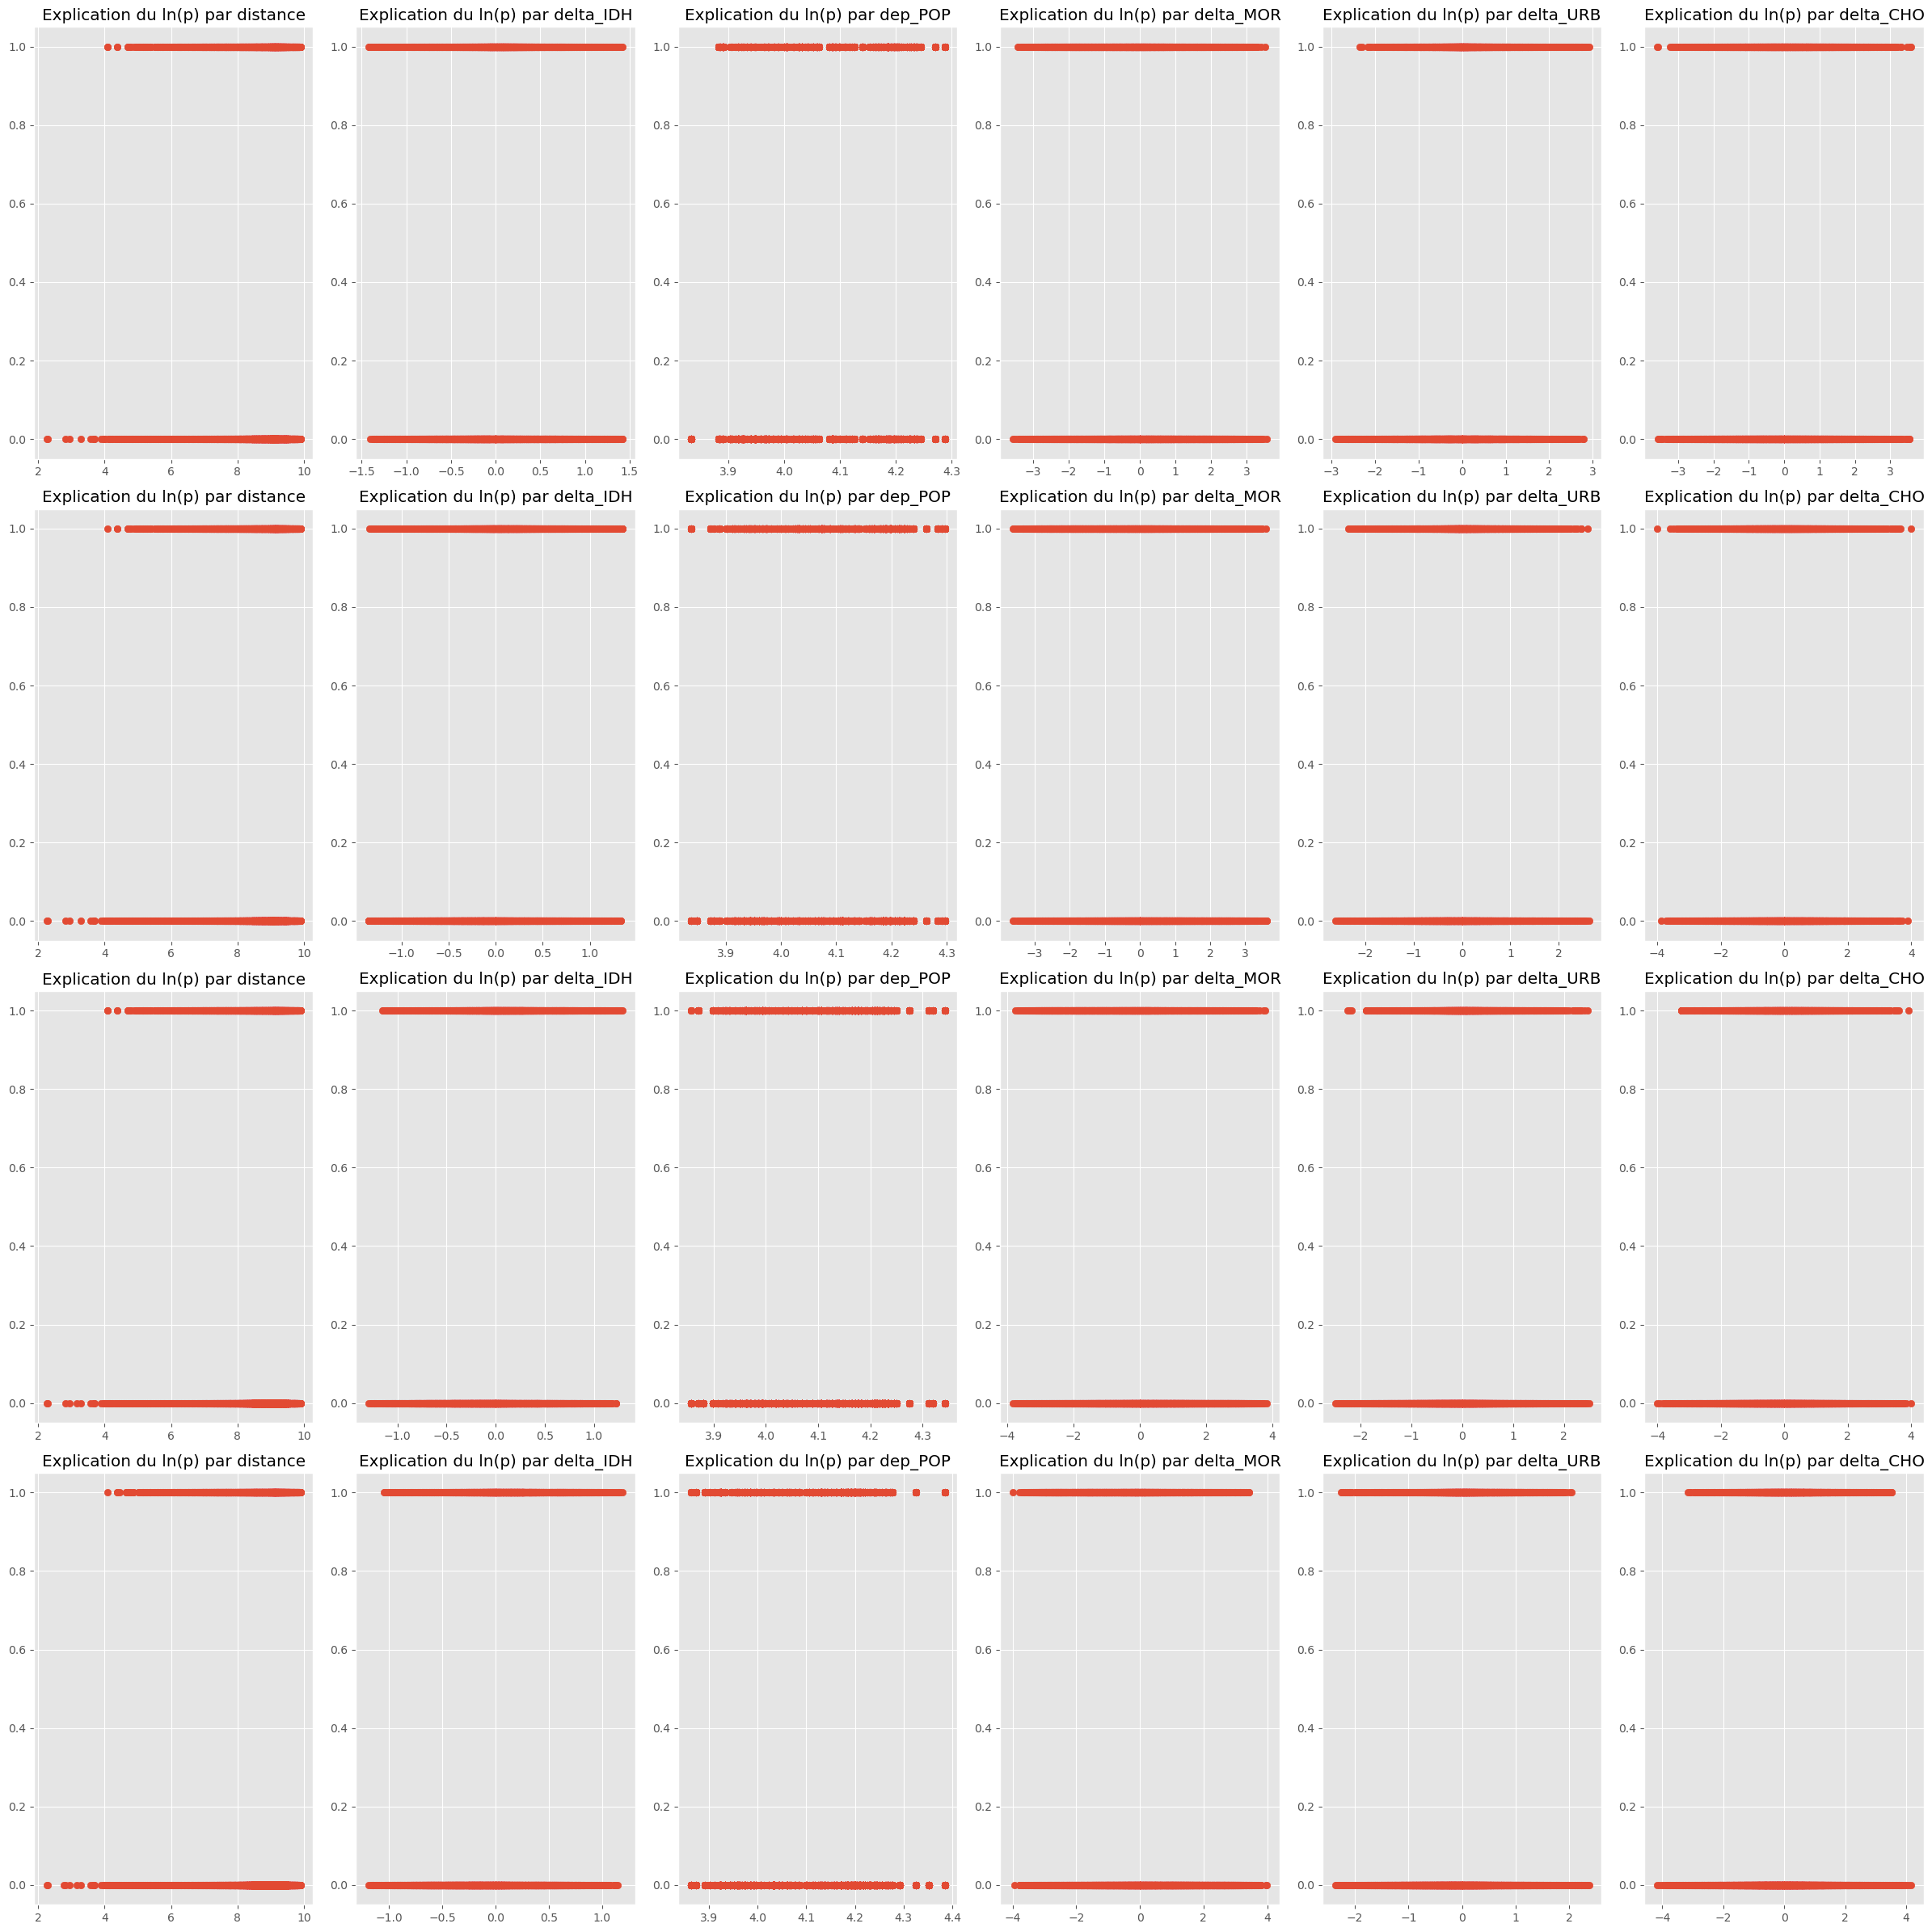

In [139]:
fig, axs = plt.subplots(ncols=6, nrows=4, figsize=(24, 24))
for row, df in enumerate([df_90, df_95, df_00, df_05]):
    for col, column in enumerate(['distance', 'delta_IDH', 'dep_POP', 'delta_MOR', 'delta_URB', 'delta_CHO']):
        ax = axs[row, col]
        ax.scatter(df[column], df['indic_move'])  
        #ax.xaxis(f'{column}')
        #ax.yaxis('ln_move')
        ax.set_title(f'Explication du ln(p) par {column}')

plt.tight_layout()  
plt.show()

In [140]:
for res in [results90, results95, results00, results05]:
    print(res.summary())

                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                16554
Model:                         Probit   Df Residuals:                    16547
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.1209
Time:                        08:39:16   Log-Likelihood:                -9924.7
converged:                       True   LL-Null:                       -11289.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.8161      0.499    -31.684      0.000     -16.794     -14.838
x1            -0.1554      0.012    -12.851      0.000      -0.179      -0.132
x2            -1.2966      0.055    -23.549      0.0